IMPORTING REQUIRED INFO UNDERSTANDING DF AND COMBINING DF 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data = pd.read_csv("test.csv")

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
titanic_df = pd.concat([train_df, test_df], ignore_index=True)


In [4]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_df.info

<bound method DataFrame.info of       survived  pclass                                               name  \
0          0.0     3.0                            Braund, Mr. Owen Harris   
1          1.0     1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1.0     3.0                             Heikkinen, Miss. Laina   
3          1.0     1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0.0     3.0                           Allen, Mr. William Henry   
...        ...     ...                                                ...   
1304       NaN     NaN                                                NaN   
1305       NaN     NaN                                                NaN   
1306       NaN     NaN                                                NaN   
1307       NaN     NaN                                                NaN   
1308       NaN     NaN                                                NaN   

         sex   age  sibsp  parch           

Check the datatypes of all the columns in the data.

In [7]:
titanic_df=pd.DataFrame(titanic_df) 

In [8]:
data_types =titanic_df .dtypes

In [9]:
titanic_df.dtypes

survived       float64
pclass         float64
name            object
sex             object
age            float64
sibsp          float64
parch          float64
ticket          object
fare           float64
cabin           object
embarked        object
PassengerId    float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
Check for null values in the dataframe. Replace the null values.

In [10]:
titanic_df = pd.DataFrame(titanic_df)  

In [11]:
null_values =titanic_df.isnull().sum()

In [12]:
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
survived        418
pclass          418
name            418
sex             418
age             595
sibsp           418
parch           418
ticket          418
fare            418
cabin          1105
embarked        420
PassengerId     891
Pclass          891
Name            891
Sex             891
Age             977
SibSp           891
Parch           891
Ticket          891
Fare            892
Cabin          1218
Embarked        891
dtype: int64


In [14]:
titanic_df =titanic_df.fillna(0)



In [16]:
print("Null values after replacement:")
print(titanic_df.isnull().sum())

Null values after replacement:
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [19]:
titanic_df['survived']

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1309, dtype: float64

In [ ]:
ENCODING THE COLUMNS IN DF


In [ ]:
ONE HOT ENCODING 

In [20]:
categorical_columns = titanic_df.select_dtypes(include=['object']).columns

In [21]:
categorical_columns 

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'Name', 'Sex', 'Ticket',
       'Cabin', 'Embarked'],
      dtype='object')

In [22]:
titanic_df.columns = titanic_df.columns.str.lower()

In [23]:
categorical_columns = titanic_df.select_dtypes(include=['object']).columns

In [24]:
titanic_df = pd.get_dummies(titanic_df, columns=categorical_columns)


In [25]:
titanic_df

,survived,pclass,age,sibsp,parch,fare,passengerid,pclass,age,sibsp,...,cabin_F4,cabin_G6,embarked_0,embarked_C,embarked_Q,embarked_S,embarked_0,embarked_C,embarked_Q,embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,False,False,False
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,0.0,0.0,0.0,0.0000,1305.0,3.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
1305,0.0,0.0,0.0,0.0,0.0,0.0000,1306.0,1.0,39.0,0.0,...,False,False,True,False,False,False,False,True,False,False
1306,0.0,0.0,0.0,0.0,0.0,0.0000,1307.0,3.0,38.5,0.0,...,False,False,True,False,False,False,False,False,False,True
1307,0.0,0.0,0.0,0.0,0.0,0.0000,1308.0,3.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
APPLYING FEATURE SCALING 

In [32]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [33]:
features =titanic_df.select_dtypes(include='number')

In [34]:
scaler = StandardScaler()

In [35]:
scaled_features = scaler.fit_transform(features)

In [36]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [37]:
scaled_df.head()

,survived,pclass,age,sibsp,parch,fare,passengerid,pclass,age,sibsp,parch,fare
0,-0.594703,1.117661,0.317566,0.684083,-0.377505,-0.336174,-0.678965,-0.624642,-0.512626,-0.260958,-0.21477,-0.318617
1,1.681513,-0.447064,1.193536,0.684083,-0.377505,1.131147,-0.678965,-0.624642,-0.512626,-0.260958,-0.21477,-0.318617
2,1.681513,1.117661,0.536558,-0.378153,-0.377505,-0.320707,-0.678965,-0.624642,-0.512626,-0.260958,-0.21477,-0.318617
3,1.681513,-0.447064,1.029291,0.684083,-0.377505,0.714477,-0.678965,-0.624642,-0.512626,-0.260958,-0.21477,-0.318617
4,-0.594703,1.117661,1.029291,-0.378153,-0.377505,-0.317842,-0.678965,-0.624642,-0.512626,-0.260958,-0.21477,-0.318617


In [38]:
scaled_df.describe()

,survived,pclass,age,sibsp,parch,fare,passengerid,pclass,age,sibsp,parch,fare
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1309.000000,1.309000e+03,1309.000000,1.309000e+03,1.309000e+03,1309.000000,1.309000e+03
mean,-1.085627e-16,4.342507e-17,4.342507e-17,-3.256880e-17,-2.171254e-17,0.000000,-1.302752e-16,0.000000,1.737003e-16,4.342507e-17,0.000000,-4.342507e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382,1.000382e+00,1.000382,1.000382e+00,1.000382e+00,1.000382,1.000382e+00
min,-5.947026e-01,-1.229427e+00,-8.868934e-01,-3.781528e-01,-3.775048e-01,-0.502308,-6.789650e-01,-0.624642,-5.126258e-01,-2.609580e-01,-0.214770,-3.186169e-01
25%,-5.947026e-01,-1.229427e+00,-8.868934e-01,-3.781528e-01,-3.775048e-01,-0.502308,-6.789650e-01,-0.624642,-5.126258e-01,-2.609580e-01,-0.214770,-3.186169e-01
50%,-5.947026e-01,3.352982e-01,-3.941602e-01,-3.781528e-01,-3.775048e-01,-0.320707,-6.789650e-01,-0.624642,-5.126258e-01,-2.609580e-01,-0.214770,-3.186169e-01
75%,1.681513e+00,1.117661e+00,7.555506e-01,-3.781528e-01,-3.775048e-01,0.091859,1.218318e+00,0.238776,-4.512015e-01,-2.609580e-01,-0.214770,-9.812492e-02
max,1.681513e+00,1.117661e+00,3.492957e+00,8.119737e+00,8.342855e+00,11.237699,1.850102e+00,1.965612,4.561556e+00,1.435269e+01,15.213292,1.406407e+01


# Clustering the df with K-Means¶

In [39]:
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans.fit(scaled_df)

KMeans(n_clusters=2, random_state=1234)

In [40]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
np.unique(labels)

array([0, 1])

Now that we have our model, let's get the clusters and how many observations each cluster has.

In [42]:
clusters = kmeans.predict(scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    891
1    418
Name: count, dtype: int64

In [43]:
clusters

array([0, 0, 0, ..., 1, 1, 1])

In [44]:
with open('kmeans_model.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [45]:
scaled_df["cluster"] = clusters
scaled_df


,survived,pclass,age,sibsp,parch,fare,passengerid,pclass,age,sibsp,parch,fare,cluster
0,-0.594703,1.117661,0.317566,0.684083,-0.377505,-0.336174,-0.678965,-0.624642,-0.512626,-0.260958,-0.214770,-0.318617,0
1,1.681513,-0.447064,1.193536,0.684083,-0.377505,1.131147,-0.678965,-0.624642,-0.512626,-0.260958,-0.214770,-0.318617,0
2,1.681513,1.117661,0.536558,-0.378153,-0.377505,-0.320707,-0.678965,-0.624642,-0.512626,-0.260958,-0.214770,-0.318617,0
3,1.681513,-0.447064,1.029291,0.684083,-0.377505,0.714477,-0.678965,-0.624642,-0.512626,-0.260958,-0.214770,-0.318617,0
4,-0.594703,1.117661,1.029291,-0.378153,-0.377505,-0.317842,-0.678965,-0.624642,-0.512626,-0.260958,-0.214770,-0.318617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,-0.594703,-1.229427,-0.886893,-0.378153,-0.377505,-0.502308,1.842374,1.965612,-0.512626,-0.260958,-0.214770,-0.092628,1
1305,-0.594703,-1.229427,-0.886893,-0.378153,-0.377505,-0.502308,1.844306,0.238776,2.091231,-0.260958,-0.214770,2.738547,1
1306,-0.594703,-1.229427,-0.886893,-0.378153,-0.377505,-0.502308,1.846238,1.965612,2.057848,-0.260958,-0.214770,-0.115087,1
1307,-0.594703,-1.229427,-0.886893,-0.378153,-0.377505,-0.502308,1.848170,1.965612,-0.512626,-0.260958,-0.214770,-0.092628,1


# Playing with the parameters¶

In [49]:
kmeans.inertia_

10039.118734452117

In [51]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(scaled_df)
print(kmeans2.inertia_)

8739.629926695667


# Choosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

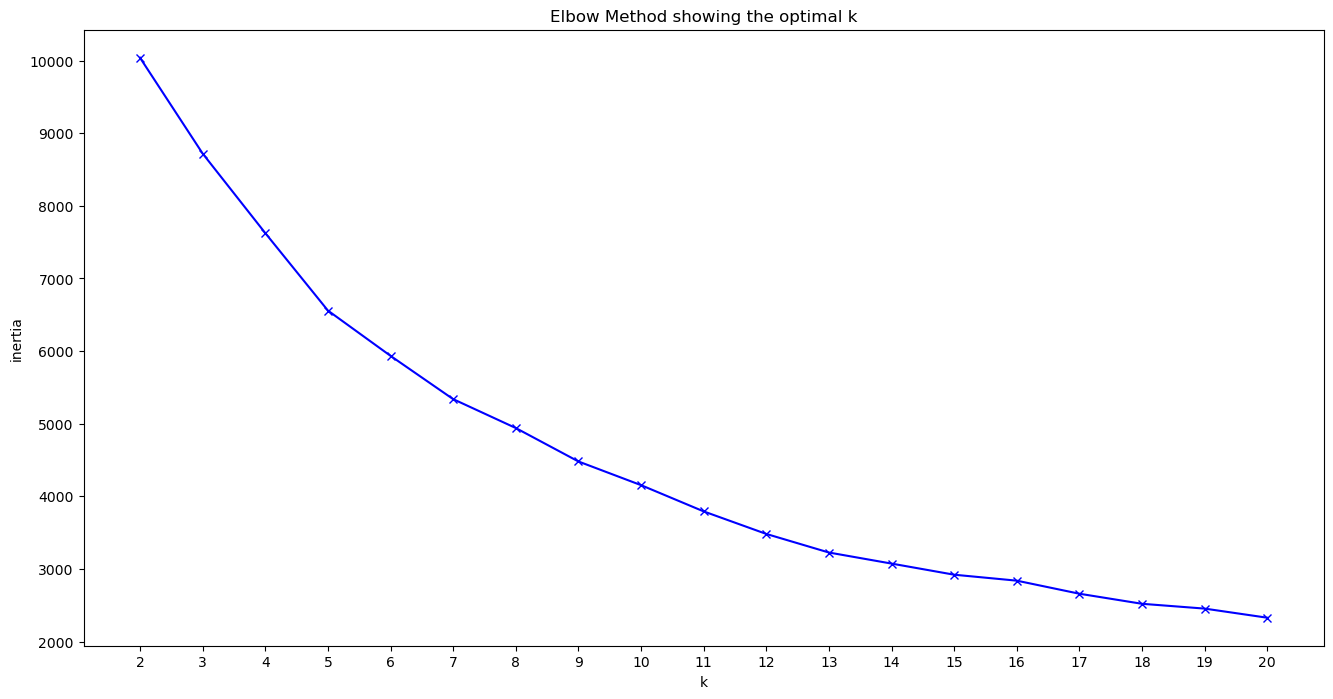

In [52]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Silhouette

In [53]:
import pickle

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

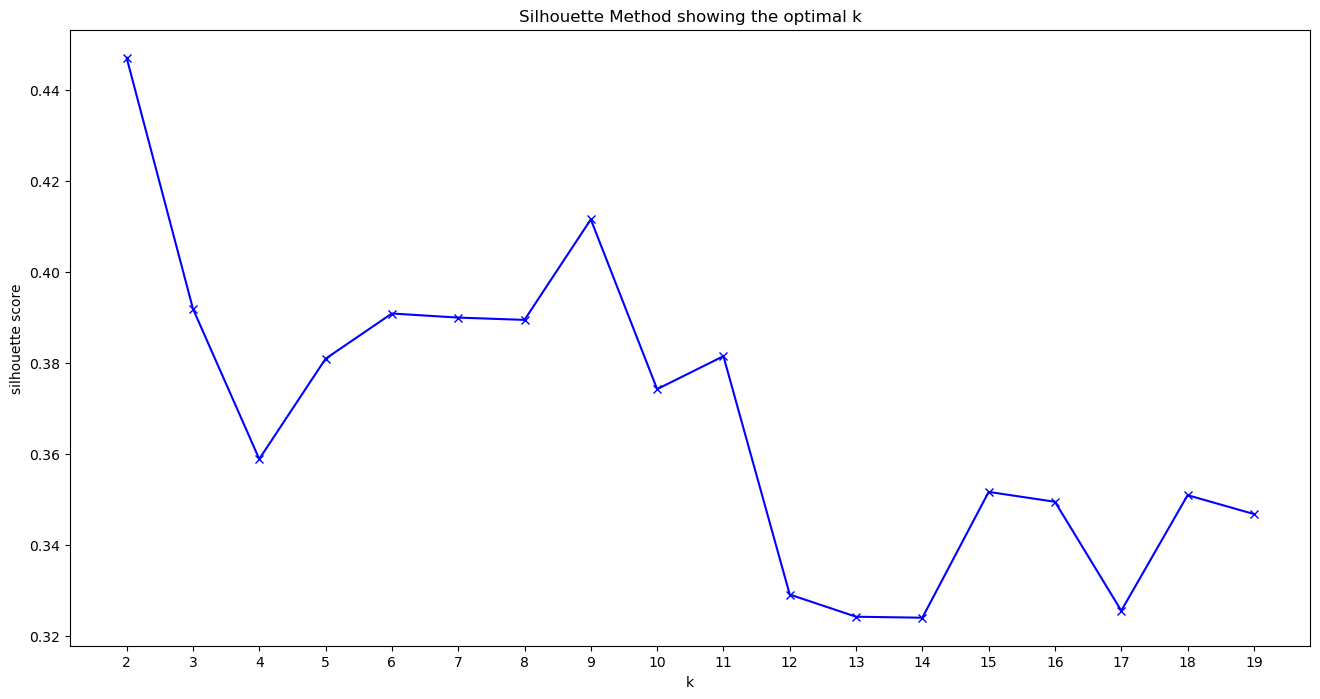

In [54]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init=10)
    kmeans.fit(scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

# Saving with pickle¶